# 🚗 Path Planning – Interpolating Discrete Points

This is where the actual task of **planning a path** begins.

In the real world, we rarely have access to a **continuous set of paths**.  
Instead, we deal with a **limited number of discrete points**, such as waypoints from cone detections or sensor outputs.

Our job is to **connect these discrete points** and generate a smooth and feasible trajectory that the vehicle can follow.

---

## Why Do We Need Interpolation?

Since we cannot drive through isolated points, we must **"connect the dots"** to create a **continuous path**.  
There are different methods for this, and choosing the right one depends on the trade-offs between:
- Accuracy
- Smoothness
- Computation time
- Real-time feasibility

You are encouraged to **explore** these topics online and understand them deeply.  
Your final goal is to **optimize the path**, so analyze each method’s **advantages and disadvantages**.

---

## Suggested Resources

### A) Linear and Quadratic Spline Interpolation
- [Linear & Quadratic Spline Intuition](https://www.youtube.com/watch?v=KLUr1A6vyzs)
- [Quadratic Interpolation Explanation](https://www.youtube.com/watch?v=j_jBK7zJ1vU)
- [Quadratic Spline Derivation](https://www.youtube.com/watch?v=kCPMph3cPA8)

### B) Cubic and Higher-Degree Spline Interpolation
- [Cubic Spline Derivation](https://www.youtube.com/watch?v=wMMjF7kXnWA)
- [Cubic Spline Example](https://www.youtube.com/watch?v=gT7F3TWihvk)

> Try solving the example problem yourself before watching the solution.  
> Now imagine scaling that to **hundreds of points** in real-time path planning!

---

## Assignment

## You are given **four discrete points** in increasing order of x:  
`(x₁, y₁), (x₂, y₂), (x₃, y₃), (x₄, y₄)`

Your task is to:
- **Interpolate these points using Cubic Spline Interpolation**
- **Plot the path obtained.**
- **Do NOT use direct library interpolation functions**
    - You can look up source code online for understanding.
    - But make sure you know **exactly what the code is doing**, step by step.

---

## What to Submit

- Your coded solution (with explanation)
- Analysis of cubic splines vs other interpolation methods
    - Think about smoothness, accuracy, computational cost, and usability in real-time systems

Happy Coding & Exploring!

## 🌟 Optional Assignment

Once you're done with the 4-point cubic spline:

Try writing your **own generic cubic spline interpolation** code for **any number of points (n ≥ 4) taken as input**.

- Again, **do not use `scipy`, `numpy.interp`, or any built-in spline functions**.
- Construct and solve the system of equations manually (or using matrix operations) based on the cubic spline conditions.

This will give you an appreciation of the complexity behind interpolation libraries — and how they are optimized.


S1(x) = 0.562 + 2.453x + -0.000x² + -0.061x³
S2(x) = -8.294 + 10.267x + -2.298x² + 0.164x³
S3(x) = 34.797 + -6.969x + -0.000x² + 0.062x³


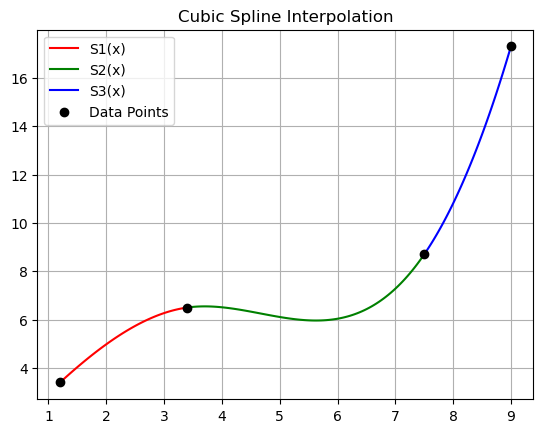

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = float(input("Enter x1: "))
y1 = float(input("Enter y1: "))
x2 = float(input("Enter x2: "))
y2 = float(input("Enter y2: "))
x3 = float(input("Enter x3: "))
y3 = float(input("Enter y3: "))
x4 = float(input("Enter x4: "))
y4 = float(input("Enter y4: "))

A = np.array([[1.0,  x1,   x1**2, x1**3,     0.0,   0.0,   0.0,    0.0,       0.0,  0.0,  0.0,    0.0      ],
              [1.0,  x2,   x2**2, x2**3,     0.0,   0.0,   0.0,    0.0,       0.0,  0.0,  0.0,    0.0      ],
              [0.0,  0.0,  0.0,   0.0,       1.0,   x2,    x2**2,  x2**3,     0.0,  0.0,  0.0,    0.0      ],
              [0.0,  0.0,  0.0,   0.0,       1.0,   x3,    x3**2,  x3**3,     0.0,  0.0,  0.0,    0.0      ],
              [0.0,  0.0,  0.0,   0.0,       0.0,   0.0,   0.0,    0.0,       1.0,  x3,   x3**2,  x3**3    ],
              [0.0,  0.0,  0.0,   0.0,       0.0,   0.0,   0.0,    0.0,       1.0,  x4,   x4**2,  x4**3    ],
              [0.0,  1.0,  2*x2,  3*(x2**2), 0.0,  -1.0,  -2*x2,  -3*(x2**2), 0.0,  0.0,  0.0,    0.0      ],    
              [0.0,  0.0,  0.0,   0.0,       0.0,   1.0,   2*x3,   3*(x3**2), 0.0, -1.0, -2*x3,  -3*(x3**2)],    
              [0.0,  0.0,  2.0,   6*x2,      0.0,   0.0,  -2.0,   -6*x2,      0.0,  0.0,  0.0,    0.0      ],    
              [0.0,  0.0,  0.0,   0.0,       0.0,   0.0,   2.0,    6*x3,      0.0,  0.0, -2.0,   -6*x3     ],    
              [0.0,  0.0,  1.0,   0.0,       0.0,   0.0,   0.0,    0.0,       0.0,  0.0,  0.0,    0.0      ],
              [0.0,  0.0,  0.0,   0.0,       0.0,   0.0,   0.0,    0.0,       0.0,  0.0,  1.0,    0.0      ]])

B = np.array([y1, y2, y2, y3, y3, y4, 0, 0, 0, 0, 0, 0])

coeffs = np.linalg.solve(A, B)
a1, b1, c1, d1 = coeffs[0:4]
a2, b2, c2, d2 = coeffs[4:8]
a3, b3, c3, d3 = coeffs[8:12]

def S1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

def S2(x):
    return a2 + b2*x + c2*x**2 + d2*x**3

def S3(x):
    return a3 + b3*x + c3*x**2 + d3*x**3

print(f"S1(x) = {a1:.3f} + {b1:.3f}x + {c1:.3f}x² + {d1:.3f}x³")
print(f"S2(x) = {a2:.3f} + {b2:.3f}x + {c2:.3f}x² + {d2:.3f}x³")
print(f"S3(x) = {a3:.3f} + {b3:.3f}x + {c3:.3f}x² + {d3:.3f}x³")

x_vals1 = np.linspace(x1, x2, 100)
x_vals2 = np.linspace(x2, x3, 100)
x_vals3 = np.linspace(x3, x4, 100)

y_vals1 = S1(x_vals1)
y_vals2 = S2(x_vals2)
y_vals3 = S3(x_vals3)

plt.plot(x_vals1, y_vals1, label='S1(x)', color='red')
plt.plot(x_vals2, y_vals2, label='S2(x)', color='green')
plt.plot(x_vals3, y_vals3, label='S3(x)', color='blue')
plt.scatter([x1, x2, x3, x4], [y1, y2, y3, y4], color='black', zorder=5, label='Data Points')
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.grid(True)
plt.show()